In [ ]:
pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 13.8 MB/s eta 0:00:00


In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
rating=ctrl.Antecedent(np.arange(0,5.1,0.1),'rating')
volume=ctrl.Antecedent(np.arange(0,101,1),'volume')
profit=ctrl.Antecedent(np.arange(0,51,1),'profit')
event=ctrl.Antecedent(np.arange(0,11,1),'event')
dis=ctrl.Antecedent(np.arange(0,51,1),'dis')
chiet_khau=ctrl.Consequent(np.arange(0,71,1),'chiet_khau')

In [ ]:
rating['low']=fuzz.trimf(rating.universe,[0,2,4])
rating['medium']=fuzz.trimf(rating.universe,[3,4,4.5])
rating['high']=fuzz.trimf(rating.universe,[4,4.5,5])

In [ ]:
volume['low']=fuzz.trimf(volume.universe,[0,15,25])
volume['medium']=fuzz.trimf(volume.universe,[20,40,60])
volume['high']=fuzz.trimf(volume.universe,[50,70,100])

In [ ]:
profit['low']=fuzz.trimf(profit.universe,[0,10,20])
profit['medium']=fuzz.trimf(profit.universe,[15,30,40])
profit['high']=fuzz.trimf(profit.universe,[30,40,50])

In [ ]:
event['none']=fuzz.trimf(event.universe,[0,2,4])
event['moderate']=fuzz.trimf(event.universe,[3,5,7])
event['high']=fuzz.trimf(event.universe,[6,8,10])

In [ ]:
dis['low']=fuzz.trimf(dis.universe,[0,10,20])
dis['medium']=fuzz.trimf(dis.universe,[15,25,40])
dis['high']=fuzz.trimf(dis.universe,[30,40,50])

In [ ]:
chiet_khau['very low']=fuzz.trimf(chiet_khau.universe,[0,2,5])
chiet_khau['low']=fuzz.trimf(chiet_khau.universe,[4,6,10])
chiet_khau['medium']=fuzz.trimf(chiet_khau.universe,[8,15,20])
chiet_khau['high']=fuzz.trimf(chiet_khau.universe,[17,25,40])
chiet_khau['very high']=fuzz.trimf(chiet_khau.universe,[35,50,70])

In [ ]:
rule1=ctrl.Rule(rating['high']& volume['high']& profit['high'], chiet_khau['very low'])
rule2=ctrl.Rule(rating['low']& volume['low']& profit['high'], chiet_khau['high'])
rule3=ctrl.Rule(event['high']& dis['high'], chiet_khau['very high'])
rule4=ctrl.Rule(rating['medium']& volume['medium']& profit['medium'], chiet_khau['medium'])
rule5=ctrl.Rule(dis['low']& volume['high']& profit['low'], chiet_khau['very low'])
rule6=ctrl.Rule(rating['low']& event['none'], chiet_khau['medium'])
rule7=ctrl.Rule(volume['low']& profit['low'], chiet_khau['very high'])

chiet khau 51.944444444444436


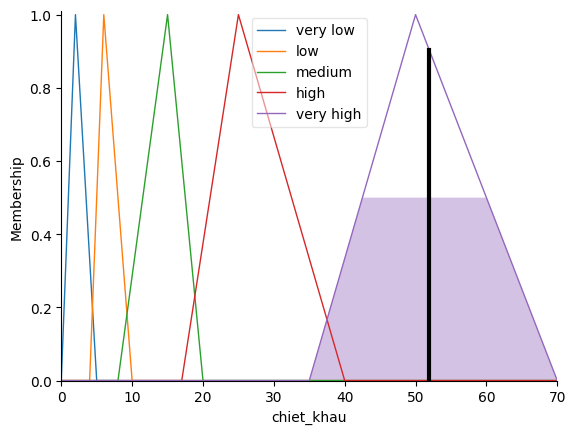

In [ ]:
control_system=ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7])
system=ctrl.ControlSystemSimulation(control_system)
system.input['rating']=4.3
system.input['volume']=20
system.input['profit']=5
system.input['event']=6
system.input['dis']=30
system.compute()
print('chiet khau',system.output['chiet_khau'])
chiet_khau.view(sim=system)